# Fitting
---

### Method of least squares


First, define the **residual** - The difference between the observed value and the predicted value, where the predicted value comes from a model, from a fit, or from some other estimation technique.


The **method of least squares** - find the functional fit that minimizes the sum of squares of the residuals 

Methods to find the best straight line to fit a series of expiemrmental points are called **least squared fit for a line** or **linear regression**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

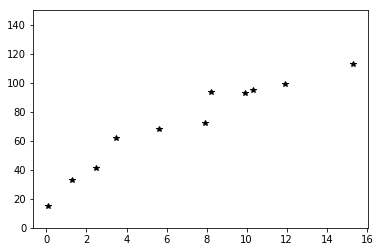

In [44]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
plt.plot(xa,ya,"*", color="Black")
plt.ylim(0,150)
plt.show()

Goal: Find a and b such that y = ax+b minimizes the sum of square of the residuals

Brute force method to do this minimization (try many combinations of a and b and calculate sum of square of the residuals for each combination)

Pseudocode:


```
Define variable to track the minimum sum of squares (min_sum_squares)

Loop over many values of a
  Loop over many values of b
    Loop over each data point
      Calculate sum of squares 
    If that sum of squares < min_sum_squares
      define new min_sum_squares
```

Try y=2x+10.  Sum of squares = 29669.04
Try y=2x+15.  Sum of squares = 24724.04
Try y=2x+20.  Sum of squares = 20329.04
Try y=2x+25.  Sum of squares = 16484.04
Try y=2x+30.  Sum of squares = 13189.04
Try y=2x+35.  Sum of squares = 10444.04
Try y=4x+10.  Sum of squares = 14299.16
Try y=4x+15.  Sum of squares = 10884.16
Try y=4x+20.  Sum of squares = 8019.16
Try y=4x+25.  Sum of squares = 5704.16
Try y=4x+30.  Sum of squares = 3939.16
Try y=4x+35.  Sum of squares = 2724.16
Try y=6x+10.  Sum of squares = 5017.36
Try y=6x+15.  Sum of squares = 3132.36
Try y=6x+20.  Sum of squares = 1797.36
Try y=6x+25.  Sum of squares = 1012.36
Try y=6x+30.  Sum of squares = 777.36
Try y=6x+35.  Sum of squares = 1092.36
Try y=8x+10.  Sum of squares = 1823.64
Try y=8x+15.  Sum of squares = 1468.64
Try y=8x+20.  Sum of squares = 1663.64
Try y=8x+25.  Sum of squares = 2408.64
Try y=8x+30.  Sum of squares = 3703.64
Try y=8x+35.  Sum of squares = 5548.64
Minimum sum of squares:  777.36
Slope for that minimum fi

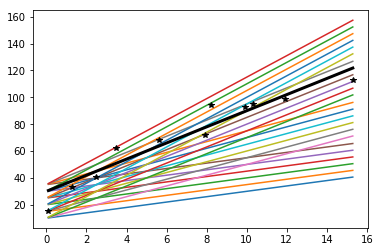

In [84]:
# Least squares "by hand"
# 
# Fit a line y = ax+b to the data
#  Vary a and b separately 
#  Find value of a and b that minimize "sum of squares of residuals"

# Data input
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)

# Create an array of values for slope and y-intercept to try out
a_array = np.arange(2,10,2)
b_array = np.arange(10,40,5)

# Create variables which we will use to track the combination 
#   of slope and y-intercept which minimizes the sum of squares.
#   Also track the current minimum sum of squares.
min_sum_squares = 999999999999.9
min_sum_squares_a = 0.0
min_sum_squares_b = 0.0

# Loop over every combination of slope and y-intercept
#   Two nested for loops
for a in a_array:
    for b in b_array:
        
        # For each combination of a and b, loop over each data point
        # and calculate the sum of squares of the residuals for that combination
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            res2 = residual * residual
            sum_squares +=res2
            
        # plot every trial
        plt.plot(xa,func(xa,a,b))
        print("Try y=",a,"x+",b,".  Sum of squares = ",sum_squares,sep='')
        
        # Check if the sum of squares for this combination is the smallest 
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
            
print("Minimum sum of squares: ",min_sum_squares)
print("Slope for that minimum fit: a =",min_sum_squares_a)
print("Y-intercept for that minimum fit: b =",min_sum_squares_b)            

# Plot the data and the best fit
plt.plot(xa,ya,"*", color="Black") 
plt.plot(xa,func(xa,min_sum_squares_a,min_sum_squares_b), color="Black",linewidth=3,)

plt.show()

Minimum sum of squares:  762.1869
Slope for that minimum fit: a = 6.3
Y-intercept for that minimum fit: b = 27.5


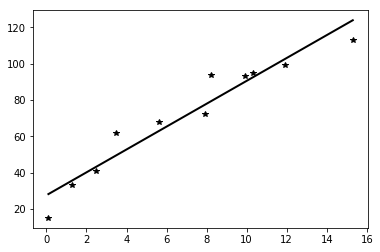

In [46]:
# Least squares "by hand" (LESS VERBOSE)
# 
# Fit a line y = ax+b to the data
#  Vary a and b separately 
#  Find value of a and b that minimize "sum of squares of residuals"

# Data input
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)

# Create an array of values for slope and y-intercept to try out
a_array = np.arange(0,20,0.1)
b_array = np.arange(0,50,0.5)

# Create variables which we will use to track the combination 
#   of slope and y-intercept which minimizes the sum of squares.
#   Also track the current minimum sum of squares.
min_sum_squares = 999999999999.9
min_sum_squares_a = 0.0
min_sum_squares_b = 0.0

# Loop over every combination of slope and y-intercept
#   Two nested for loops
for a in a_array:
    for b in b_array:
        
        # For each combination of a and b, loop over each data point
        # and calculate the sum of squares of the residuals for that combination
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            res2 = residual * residual
            sum_squares +=res2


        #print("Try y=",a,"x+",b,".  Sum of squares = ",sum_squares,sep='')
        
        # Check if the sum of squares for this combination is the smallest 
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
            
print("Minimum sum of squares: ",min_sum_squares)
print("Slope for that minimum fit: a =",min_sum_squares_a)
print("Y-intercept for that minimum fit: b =",min_sum_squares_b)            

# Plot the data and the best fit
plt.plot(xa,ya,"*", color="Black") 
plt.plot(xa,func(xa,min_sum_squares_a,min_sum_squares_b), color="Black",linewidth=2,)

plt.show()

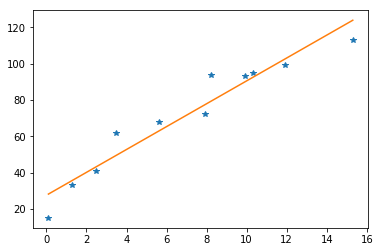

In [5]:
def func(x, a, b):
    return a * x + b

plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,min_sum_squares_a,min_sum_squares_b))
plt.show()

[ 6.74706782  7.01093222  5.53836658  7.0804632   4.799095    8.45281942
  5.68916599  5.48524501  0.79974733  2.19952132  5.91994046  7.13089287
  6.23614666  4.71091237  2.19604022  6.78824203  7.39066954  3.67105938
  5.4309717   4.66448133  8.9073117   3.81119507  9.8721145   3.68120977
  5.75538935  2.44656879  1.68775791  3.91013313  4.48878714  6.60986453
  9.96268491  7.12829254  8.28296302  9.06634791  6.33629705  6.53308502
  2.45508155  3.38535846  7.25611149  9.51579355  7.22234669  5.61887093
  0.0562584   6.14434669  0.77131001  2.99597865  3.4285527   2.9041851
  9.57086072  3.91977092  9.81267443  1.81969763  6.04754314  7.35283143
  7.10508576  5.39164991  8.15249078  5.46525903  7.5614342   0.11735172
  9.55887672  2.2117553   6.30467886  2.36057131  4.47997083  4.839099
  8.96609804  8.24836208  6.48802071  5.09809611  0.99793961  4.70754785
  8.76009719  7.61957134  4.00378377  1.75490687  1.33342602  7.72465221
  8.29156616  1.29592007  1.41091665  4.32030298  0.53

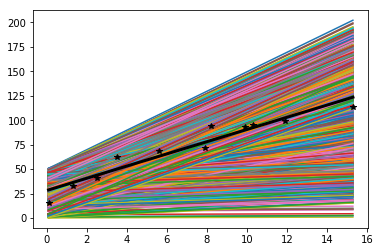

In [89]:
# Least squares "by hand" - This time use a "Monte Carlo" method
# 
# Fit a line y = ax+b to the data
#  Vary a and b separately 
#  Find value of a and b that minimize "sum of squares of residuals"

# Data input
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)

# Create an array of values for slope and y-intercept to try out
a_array = np.random.uniform(0,10,100) 
b_array = np.random.uniform(0,50,100)

print(a_array)
print(b_array)

# Create variables which we will use to track the combination 
#   of slope and y-intercept which minimizes the sum of squares.
#   Also track the current minimum sum of squares.
min_sum_squares = 999999999999.9
min_sum_squares_a = 0.0
min_sum_squares_b = 0.0

# Loop over every combination of slope and y-intercept
#   Two nested for loops
count = 0
for a in a_array:
    for b in b_array:
        count+=1
        # For each combination of a and b, loop over each data point
        # and calculate the sum of squares of the residuals for that combination
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            res2 = residual * residual
            sum_squares +=res2

        # plot every trial          
        if (count%7==0):
            plt.plot(xa,func(xa,a,b))
        #print("Try y=",a,"x+",b,".  Sum of squares = ",sum_squares,sep='')
        
        # Check if the sum of squares for this combination is the smallest 
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
            
print("Minimum sum of squares: ",min_sum_squares)
print("Slope for that minimum fit: a =",min_sum_squares_a)
print("Y-intercept for that minimum fit: b =",min_sum_squares_b)            

# Plot the data and the best fit
plt.plot(xa,ya,"*", color="Black") 
plt.plot(xa,func(xa,min_sum_squares_a,min_sum_squares_b), color="Black",linewidth=3,)

plt.show()

```
Iterate method:
Slope for that minimum fit: a = 6.3
Y-intercept for that minimum fit: b = 27.5

Monte Carlo:
Slope for that minimum fit: a = 6.23614666262
Y-intercept for that minimum fit: b = 28.0624591898
```

For this relatively simple fit, we can also find a and b using calculus (find a and b such that you minimize the sum of square function)

EXAMPLE: CHALK BOARD






We just showed that we will need to find the value of some sums. We can do this easily with numpy:



In [98]:
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)


xa_sum = xa.sum()
ya_sum = ya.sum()

xa_squared_sum = np.square(xa).sum()
xa_times_ya_sum = np.multiply(xa, ya).sum()

print('n = ',len(xa))
print('sum x = ',xa_sum)
print('sum y = ',ya_sum)
print('sum x^2 = ',xa_squared_sum)
print('sum x*y = ',xa_times_ya_sum)


n =  11
sum x =  76.5
sum y =  785.0
sum x^2 =  761.01
sum x*y =  6890.5


Now that we know these values

EXAMPLE CHALKBOARD:


```
Derivative minimization
Slope for that minimum fit: a = 6.25
Y-intercept for that minimum fit: b = 27.897

Iterate method:
Slope for that minimum fit: a = 6.3
Y-intercept for that minimum fit: b = 27.5

Monte Carlo:
Slope for that minimum fit: a = 6.23614666262
Y-intercept for that minimum fit: b = 28.0624591898
```

#### scipy fitting tools

scipy.optimize.least_squares
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.least_squares.html

scipy.optimize.curve_fit
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html


In [6]:
from scipy.optimize import curve_fit

In [49]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)


fit_result_a 6.25004962422
fit_result_b 27.8973821504



```
More advanced fit using scipy
Slope for that minimum fit: a = 6.25004962422
Y-intercept for that minimum fit: b = 27.8973821504

Derivative minimization
Slope for that minimum fit: a = 6.25
Y-intercept for that minimum fit: b = 27.897

Iterate method:
Slope for that minimum fit: a = 6.3
Y-intercept for that minimum fit: b = 27.5

Monte Carlo:
Slope for that minimum fit: a = 6.23614666262
Y-intercept for that minimum fit: b = 28.0624591898
```

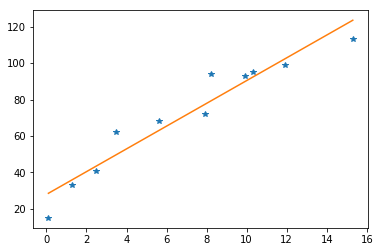

In [8]:
xaa = np.linspace(0.1,16,200)
plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,fit_result_a,fit_result_b))
plt.show()

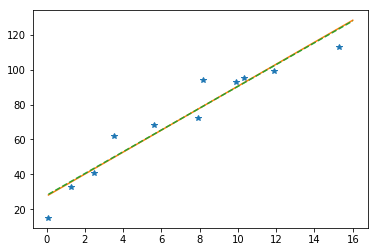

In [9]:
#Compare "by hand" and curve_fit
plt.plot(xa,ya,"*")
plt.plot(xaa,func(xaa,min_sum_squares_a,min_sum_squares_b))
plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"--")
plt.show()

[[  0.36954411  -2.57001129]
 [ -2.57001129  25.56606882]]
fit_result_a 6.25004962422 +- 0.636881838906
fit_result_b 27.8973821504 +- 4.99295879317


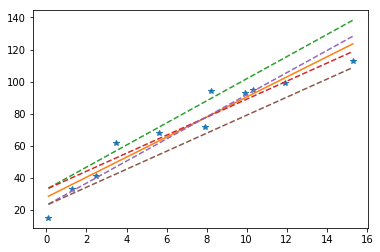

In [99]:
# Is there uncertainty on the fit?

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

# Estimate of the uncertainy in the fit parameter
sigma_a = pcov1[0,0]**0.5
sigma_b = pcov1[1,1]**0.5

print(pcov)

print("fit_result_a", fit_result_a,"+-", sigma_a)
print("fit_result_b", fit_result_b,"+-", sigma_b)

xaa = np.linspace(0.1,16,200)
plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,fit_result_a,fit_result_b))
plt.plot(xa,func(xa,fit_result_a+sigma_a,fit_result_b+sigma_b),"--")
plt.plot(xa,func(xa,fit_result_a-sigma_a,fit_result_b+sigma_b),"--")
plt.plot(xa,func(xa,fit_result_a+sigma_a,fit_result_b-sigma_b),"--")
plt.plot(xa,func(xa,fit_result_a-sigma_a,fit_result_b-sigma_b),"--")

plt.show()

[[  0.36954411  -2.57001129]
 [ -2.57001129  25.56606882]]
fit_result_a 6.25004962422 +- 0.636881838906
fit_result_b 27.8973821504 +- 4.99295879317
variations =  [[  33.57903409   41.84335185   50.1076696    56.99460106   71.45715714
    87.2970995    89.36317894  101.07096243  103.82573501  114.84482535
   138.26039233]
 [  33.45165772   40.18745906   46.92326041   52.53642819   64.32408054
    77.23436645   78.91831678   88.46070202   90.70596913   99.68703759
   118.77180806]
 [  23.5931165    31.85743426   40.12175201   47.00868348   61.47123955
    77.31118192   79.37726135   91.08504484   93.83981743  104.85890777
   128.27447474]
 [  23.46574014   30.20154148   36.93734282   42.55051061   54.33816295
    67.24844886   68.9323992    78.47478443   80.72005155   89.70112
   108.78589047]]
fitError =  [  4.99336497   5.06113947   5.24068249   5.46794878   6.13594597
   7.08832044   7.22519369   8.04265531   8.24388875   9.07575176
  10.94901213]


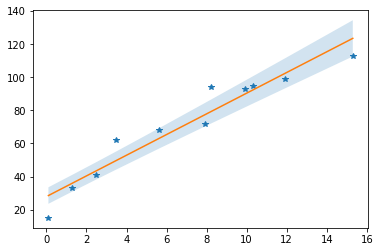

In [101]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

# Estimate of the uncertainy in the fit parameter
fit_result_a_uncert = pcov1[0,0]**0.5
fit_result_b_uncert = pcov1[1,1]**0.5

print(pcov)

print("fit_result_a", fit_result_a,"+-", fit_result_a_uncert)
print("fit_result_b", fit_result_b,"+-", fit_result_b_uncert)

xaa = np.linspace(0.1,16,200)
plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,fit_result_a,fit_result_b))


variations = np.array([
    func(xa,fit_result_a+sigma_a,fit_result_b+sigma_b), 
    func(xa,fit_result_a-sigma_a,fit_result_b+sigma_b),   
    func(xa,fit_result_a+sigma_a,fit_result_b-sigma_b), 
    func(xa,fit_result_a-sigma_a,fit_result_b-sigma_b), 
    ])

print('variations = ',variations)

fitError = np.std(variations, axis=0)
print('fitError = ',fitError)

fit_vary_up = func(xa,fit_result_a,fit_result_b)+fitError
fit_vary_dn = func(xa,fit_result_a,fit_result_b)-fitError
plt.fill_between(xa, fit_vary_up, fit_vary_dn,alpha=0.2,) 

plt.show()

Are we sure a linear fit was the right choice?

Lets try a few other options

In [68]:
# Degree 2 polynomial

def func2(x, a, b, c):
    return a * x * x + b * x + c

popt, pcov = curve_fit(func2, xa, ya, p0 = [1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)
print("fit_result_c", fit_result_c)

fit_result_a -0.29770469226
fit_result_b 10.5637630296
fit_result_c 18.493488756


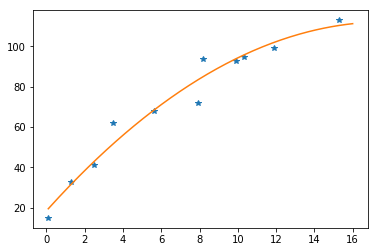

In [69]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func2(xaa, fit_result_a, fit_result_b, fit_result_c))
plt.show()

In [70]:
# Degree 3 polynomial

def func3(x, a, b, c, d):
    return a * x * x * x + b * x * x + c * x + d

popt, pcov = curve_fit(func3, xa, ya, p0 = [1, 1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]
fit_result_d   = popt[3]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)
print("fit_result_c", fit_result_c)
print("fit_result_d", fit_result_d)

fit_result_a 0.0273381426479
fit_result_b -0.943795638696
fit_result_c 14.5027295004
fit_result_d 14.3985908984


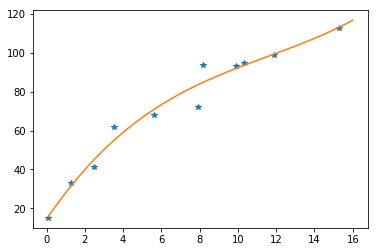

In [71]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func3(xaa, fit_result_a, fit_result_b, fit_result_c, fit_result_d))
plt.show()

In [72]:
# Degree 6 polynomial


def func6(x, a6,a5,a4,a3,a2,a1,a0):
    return a6*x**6+a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func6, xa, ya, p0 = [1, 1, 1, 1, 1, 1, 1])

fa6   = popt[0]
fa5   = popt[1]
fa4   = popt[2]
fa3   = popt[3]
fa2   = popt[4]
fa1   = popt[5]
fa0   = popt[6]

print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa6 0.000489834095532
fa5 -0.0208601797612
fa4 0.327023651142
fa3 -2.27416322999
fa2 6.02927624194
fa1 7.70134413397
fa0 14.5632394315


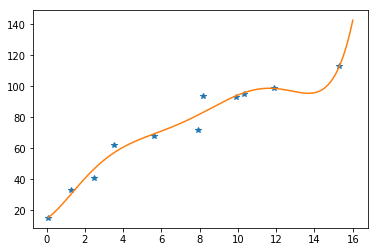

In [73]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func6(xaa, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [74]:
# Degree 8 polynomial


def func8(x, a8,a7,a6,a5,a4,a3,a2,a1,a0):
    return a8*x**8+a7*x**7+a6*x**6\
          +a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func8, xa, ya, p0 = [ 1, 1, 1, 1, 1, 1, 1, 1,1])

fa8 = popt[0]
fa7 = popt[1]
fa6 = popt[2]
fa5 = popt[3]
fa4 = popt[4]
fa3 = popt[5]
fa2 = popt[6]
fa1 = popt[7]
fa0 = popt[8]


print("fa8", fa8)
print("fa7", fa7)
print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa8 -0.000301651536828
fa7 0.0166810702831
fa6 -0.372856555093
fa5 4.3253282937
fa4 -27.7634228113
fa3 97.0273933254
fa2 -169.060870112
fa1 128.332655363
fa0 3.75110503546


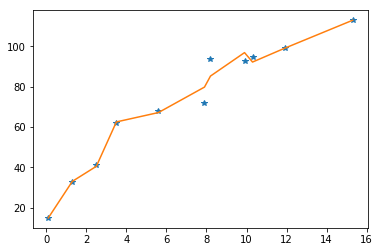

In [75]:
plt.plot(xa,ya,"*")
plt.plot(xa,func8(xa, fa8, fa7, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [76]:
# Degree 10 polynomial


def func10(x, a10,a9,a8,a7,a6,a5,a4,a3,a2,a1,a0):
    return a10*x**10+a9*x**9+a8*x**8+a7*x**7+a6*x**6\
          +a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func10, xa, ya, p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1])

fa10   = popt[0]
fa9   = popt[1]
fa8   = popt[2]
fa7   = popt[3]
fa6   = popt[4]
fa5   = popt[5]
fa4   = popt[6]
fa3   = popt[7]
fa2   = popt[8]
fa1   = popt[9]
fa0   = popt[10]

print("fa10", fa10)
print("fa9", fa9)
print("fa8", fa8)
print("fa7", fa7)
print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa10 0.000169121533015
fa9 -0.0115335305796
fa8 0.334554947992
fa7 -5.39082370476
fa6 52.8468387592
fa5 -324.426460515
fa4 1237.04571722
fa3 -2804.88505478
fa2 3430.3777726
fa1 -1781.50347439
fa0 161.53094215


/Applications/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


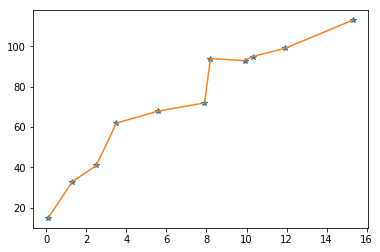

In [77]:
plt.plot(xa,ya,"*")
plt.plot(xa,func10(xa, fa10, fa9, fa8, fa7, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [20]:
print(xa)

[  0.1   1.3   2.5   3.5   5.6   7.9   8.2   9.9  10.3  11.9  15.3]


In [21]:
print(ya)

[  15.   33.   41.   62.   68.   72.   94.   93.   95.   99.  113.]


In [78]:
# y = a * log(bx)


def funcLog(x, a, b):
    return a * np.log(b*x)

popt, pcov = curve_fit(funcLog, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]


print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)


fit_result_a 19.6457166782
fit_result_b 8.94834380888


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


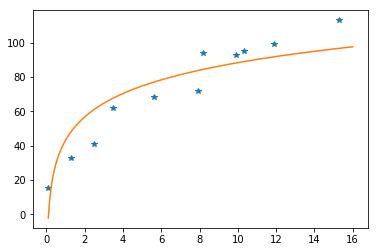

In [79]:
manydiv = np.linspace(0.1,16,200)

plt.plot(xa,ya,"*")
plt.plot(xaa,funcLog(xaa, fit_result_a, fit_result_b))
plt.show()

In [80]:
# y = a * log(bx) + c*x +d 


def funcLog2(x, a, b, c ,d):
    return a * np.log(b*x) +  c * x +d

popt, pcov = curve_fit(funcLog2, xa, ya, p0 = [1, 1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]
fit_result_d   = popt[3]


print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)


fit_result_a 7.80531854532
fit_result_b 141.198348616


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


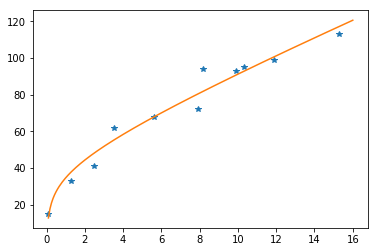

In [24]:

plt.plot(xa,ya,"*")
plt.plot(xaa,funcLog2(xaa, fit_result_a, fit_result_b , fit_result_c, fit_result_d))
plt.show()

### Taking uncertainties into account

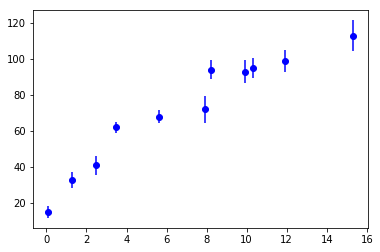

In [25]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra = np.array(yerrlist,float)

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#
plt.show()

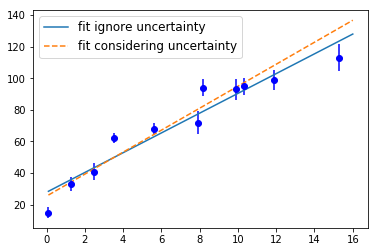

In [81]:
def func(x, a, b):
    return a * x + b

# Fit, not considering uncertainty
popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])
fit_result_a   = popt[0]
fit_result_b   = popt[1]

# Fit, considering uncertainty
popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra)
fit_result_a_with_error   = popt[0]
fit_result_b_with_error   = popt[1]

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"-",label='fit ignore uncertainty')
plt.plot(xaa,func(xaa,fit_result_a_with_error,fit_result_b_with_error),"--",label='fit considering uncertainty')

plt.legend(loc='upper left', fontsize='large')

plt.show()

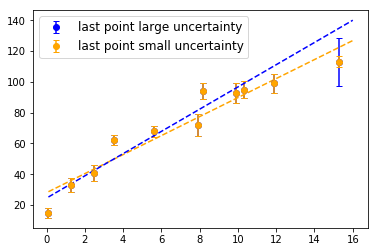

In [28]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist1 = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 3.6 ]
yerrlist2 = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 15.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra1 = np.array(yerrlist1,float)
yerra2 = np.array(yerrlist2,float)

popt1, pcov1 = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra1)
popt2, pcov2 = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra2)

fit_result_a_with_error1   = popt1[0]
fit_result_b_with_error1   = popt1[1]
fit_result_a_with_error2   = popt2[0]
fit_result_b_with_error2   = popt2[1]


plt.errorbar(xa, ya, yerra2, fmt="o",color="Blue",linestyle='', capsize=3, label='last point large uncertainty')#
plt.errorbar(xa, ya, yerra1, fmt="o",color="Orange",linestyle='', capsize=3, label='last point small uncertainty')#


plt.plot(xaa,func(xaa,fit_result_a_with_error1,fit_result_b_with_error1),"--",color="Orange")
plt.plot(xaa,func(xaa,fit_result_a_with_error2,fit_result_b_with_error2),"--",color="Blue")

plt.legend(loc='upper left', fontsize='large')

plt.show()

#### Fit with uncertainty - by hand - details

Assume the probability of the measured value is "normally distributed".

Normal distribution:

$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Here $\mu$ is the mean and $\sigma$ is the standard deviation. 

We can use the functional fit as a proxy for the mean or expected value and use the uncertainty on the measured value as a proxy for the standard deviation. 

We will assume a fit of the form:

$y_i = ax_i +b$

Therefore the probability that we measured any given value of y is:

$Prob(y_i)=\frac{e^{-(y_i-ax_i-b)^2}/2\sigma_y^2}{\sigma_y}$


$Prob(y_i)=\frac{1}{\sqrt{2\pi\sigma_y^2}}e^{-\frac{(y_i-ax_i-b)^2}{2\sigma_y^2}}$ 

The probability of this dataset originating from our model is therfore given by the product of probabilities for each data point:

$Prob(y_1,....,y_N)=Prob(y_1)Prob(y_2)...Prob(y_N)$

$Prob(y_1,....,y_N)\approx e^{-\frac{(y_1-ax_1-b)^2}{2\sigma_y^2}}e^{-\frac{(y_2-ax_2-b)^2}{2\sigma_y^2}}...e^{-\frac{(y_N-ax_N-b)^2}{2\sigma_y^2}}$


$Prob(y_1,....,y_N)\approx e^{-\sum_{i=1}^{N}\frac{(y_i-ax_i-b)^2}{2\sigma_y^2}}$

$Prob(y_1,....,y_N)\approx e^{-\frac{\chi^2}{2}}$

Where we have defined **"chi squared"**:

$\chi^2=\sum_{i=1}^{N}\frac{(y_i-ax_i-b)^2}{\sigma_y^2}$

This looks a lot like our sum of squares, except now the sum of squares is weighted by the uncertainty:

$\chi^2=\sum_{i=1}^{N}\frac{(observed-expected)^2}{\sigma^2}$

We will use the chi squared formula to find the best fit with uncertainty.

In [116]:
# Least squares "by hand" with uncertainty

xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra = np.array(yerrlist,float)


a_array = np.arange(0,20,0.1)
b_array = np.arange(-20,50,0.5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1



for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            sigma  = yerra[index]
            pull =  (residual/sigma)
            sum_squares +=pull*pull
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
print("minimum chi squared = ",min_sum_squares)
print("minimum chi squared / ndof = ",min_sum_squares/2)
print("a = ",min_sum_squares_a)
print("b = ",min_sum_squares_b)

min_sum_squares_a_uncert_y = min_sum_squares_a
min_sum_squares_b_uncert_y = min_sum_squares_b

minimum chi squared =  40.4749327694
minimum chi squared / ndof =  20.2374663847
a =  6.9
b =  25.5


fit_result_a 6.25004962422
fit_result_b 27.8973821504


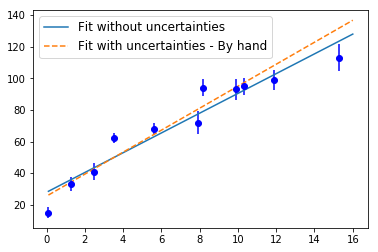

In [112]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

print("fit_result_a",fit_result_a)
print("fit_result_b",fit_result_b)

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),label="Fit without uncertainties")

plt.plot(xaa,func(xaa,min_sum_squares_a,min_sum_squares_b),"--",label="Fit with uncertainties - By hand")


plt.legend(loc='upper left', fontsize='large')


plt.show()

### Uncertainties in x and y

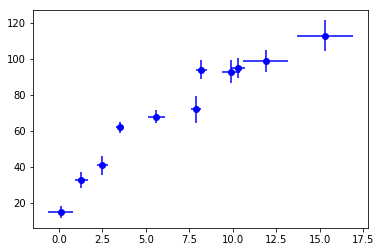

In [38]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xerrlist = [0.7, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.4, 1.3, 1.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
xerra = np.array(xerrlist,float)
yerra = np.array(yerrlist,float)

plt.errorbar(xa, ya, xerr=xerra ,yerr=yerra, fmt="o",color="Blue",linestyle='')#
plt.show()

In order to obtain a fit while taking x-uncertainty into account we need to modify our sum of squares again:

$\sum_{i=1}^{N}\frac{(y_i-ax_i-b)^2}{\sigma_y^2+b^2\sigma_x^2}$



In [119]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xerrlist = [0.7, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.4, 1.3, 1.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
xerra = np.array(xerrlist,float)
yerra = np.array(yerrlist,float)


a_array = np.arange(0,20,0.1)
b_array = np.arange(-20,50,0.5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1



for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            sigmay  = yerra[index]
            sigmax  = xerra[index]
            sum_squares +=residual*residual/(sigmay*sigmay+b*b*sigmax*sigmax)
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
            
print("minimum chi squared = ",min_sum_squares)
print("minimum chi squared / ndof = ",min_sum_squares/2)
print("a = ",min_sum_squares_a)
print("b = ",min_sum_squares_b)

min_sum_squares_a_uncert_xy = min_sum_squares_a
min_sum_squares_b_uncert_xy = min_sum_squares_b

minimum chi squared =  3.69016312518
minimum chi squared / ndof =  1.84508156259
a =  5.5
b =  38.5


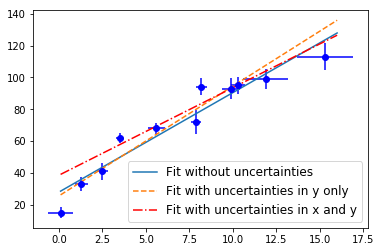

In [122]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

plt.errorbar(xa, ya, xerr=xerra ,yerr=yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),label="Fit without uncertainties")

plt.plot(xaa,func(xaa,min_sum_squares_a_uncert_y,min_sum_squares_b_uncert_y),"--",label="Fit with uncertainties in y only")

plt.plot(xaa,func(xaa,min_sum_squares_a_uncert_xy,min_sum_squares_b_uncert_xy),"-.r",label="Fit with uncertainties in x and y")

plt.legend(loc='lower right', fontsize='large')

plt.show()

### Fitting a histogram

n= [ 166.  159.  156.  114.  146.  130.  114.  122.  137.  110.   96.   99.
   92.   94.   93.  110.   79.   81.   80.   84.   55.   65.   63.   65.
   56.   59.   61.   61.   49.   44.   35.   35.   33.   36.   44.   24.
   33.   28.   37.   30.   28.   31.   24.   22.   26.   22.   19.   22.
   26.   26.]
bins= [   0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
   24.   26.   28.   30.   32.   34.   36.   38.   40.   42.   44.   46.
   48.   50.   52.   54.   56.   58.   60.   62.   64.   66.   68.   70.
   72.   74.   76.   78.   80.   82.   84.   86.   88.   90.   92.   94.
   96.   98.  100.]
patches= <a list of 1 Patch objects>
No     =  169.437951326
tau_mu =  49.4732516743
B      =  -4.29585699006

**************************************************
Fit result: N(t)= 169.438*e^(-t/49.4733)+-4.29586
**************************************************


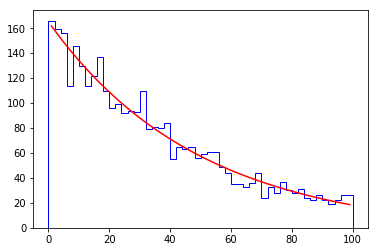

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create some fake data with np.random.exponential
Npoints = 4000
scale    = 7      # f(x)=(1/scale)e^(-x/scale)
s = 7*np.random.exponential(scale, Npoints) - 1 

# Normally we do this to plot:
# plt.hist(s, bins=100, normed=True, histtype='step',color='blue')

# Instead we can do the following such that we access the tuple
#      returned by plt.hist returns a tuple 
#      which contains arrays of the information that is being plotted:
#      ( http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
#    n = array containing the number of entries in each bin )
#    bins = array containing the bin edges (so the length is nbins +1)

(n,bins,patches) = plt.hist(s, bins=50,  range=(0,100), normed=False, histtype='step',color='blue')

print("n=",n)
print("bins=",bins)
print("patches=",patches)

# to fit we an array of bin centers:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# define the function to fit
def f(t, No, tau_mu, B):
    return No*np.exp(-t/tau_mu) + B

# scipy.optimize.curve_fit
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
# p0 is the initial guess for the function parameters
popt, pcov = curve_fit(f, bin_centers, n, p0 = [1, 1, 1])

# curve_fit returns popt which is an array of the fit parameters
fit_result_No     = popt[0]
fit_result_tau_mu = popt[1]
fit_result_B      = popt[2]

print("No     = " , fit_result_No    )
print("tau_mu = " , fit_result_tau_mu)
print("B      = " , fit_result_B     )
print()
print("*"*50)
print("Fit result: N(t)= ",'{:g}'.format(fit_result_No),"*e^(-t/",'{:g}'.format(fit_result_tau_mu),")+",'{:g}'.format(fit_result_B),  sep='')
print("*"*50)


plt.plot(bin_centers, f(bin_centers, fit_result_No, fit_result_tau_mu, fit_result_B  ), 'r')
plt.show()